# WQD7005 - Data Mining
## FINAL EXAM

### Matrix Number : 17043640

### Name                 : Gunasegarran Magadevan

<center><img src='questions/q1.png'></center>

In [1]:
# Import packages
from bs4 import BeautifulSoup
import urllib.request
import pandas as pd
import numpy as np
import csv
from pathlib import Path

url = 'https://files.osf.io/v1/resources/bvn42/providers/osfstorage/5db1b6360db187000c3a7c04?action=download&direct&version=1';df = pd.read_csv(url, sep=",");url1 = "https://www.investing.com/commodities/gold-historical-data"
req = urllib.request.Request(url1, data=None, headers={'User-Agent': 'Chrome/35.0.1916.47'})

soup = BeautifulSoup(urllib.request.urlopen(req).read(),"lxml")

#extract data 
rows = soup.find('table',{'class': 'genTbl closedTbl historicalTbl'}).findAll('tr')[1:]
data = []
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip(' ') for ele in cols]
    data.append([ele for ele in cols if ele])
colnames = soup.find('table',{'class': 'genTbl closedTbl historicalTbl'}).findAll('tr')[:1]
col_names = []
for col in colnames:
    cols = col.find_all('th')
    cols = [ele.text.strip() for ele in cols]
    col_names.append(cols)
col_names = col_names[0]
    
#Write data to files
df1 = pd.DataFrame(data,columns = col_names)

# Writing the DataFrame: df to CSV file
df.to_csv('HouseData.csv')

In [2]:
# Displaying top 5 DataFrame: df
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<center><img src='questions/q2.png'></center>

1. <b>Snowflake Schema</b> is a logical arrangement of tables in a multidimensional database such that the <b>Entity Relationship Table</b> resembles a snowflake shape.
2. <b>Snowflake Schema</b> is an extension of a <b>Star Schema</b>, and it adds additional dimensions.
3. The dimension tables are <b>normalized</b> which splits data into additional tables.

In [3]:
# Displaying column name from DataFrame: df
print(df.columns.tolist())

['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


In [4]:
# Table normalize to fact_house
fact_house = df[['id', 'date','price','condition','grade']]
fact_house.head(2)

,id,date,price,condition,grade
0,7129300520,20141013T000000,221900.0,3,7
1,6414100192,20141209T000000,538000.0,3,7


<img src='snowflakes/fact_house.png' width="100" height="600">
<hr>

In [5]:
# Table normalize to dim_room
dim_room = df[['id','bedrooms','bathrooms','floors']]
dim_room.head(2)

,id,bedrooms,bathrooms,floors
0,7129300520,3,1.00,1.0
1,6414100192,3,2.25,2.0


<img src='snowflakes/dim_room.png' width="100" height="60">
<hr>

In [6]:
# Table normalize to dim_sqft
dim_sqft = df[['id', 'sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']]
dim_sqft.head(2)

,id,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,7129300520,1180,5650,1180,0,1340,5650
1,6414100192,2570,7242,2170,400,1690,7639


<img src='snowflakes/dim_sqft.png' width="100" height="600">
<hr>

In [7]:
# Table normalize to dim_renovation
dim_renovation = df[['id','yr_built','yr_renovated']]
dim_renovation.head(2)

,id,yr_built,yr_renovated
0,7129300520,1955,0
1,6414100192,1951,1991


<img src='snowflakes/dim_renovation.png' width="100" height="600">
<hr>

In [8]:
# Table normalize to dim_zipcode
dim_zipcode = df[['id','zipcode','lat','long']]
dim_zipcode.head(2)

,id,zipcode,lat,long
0,7129300520,98178,47.5112,-122.257
1,6414100192,98125,47.7210,-122.319


<img src='snowflakes/dim_zipcode.png' width="100" height="600">
<hr>

In [9]:
# Table normalize to dim_longlat
dim_longlat = df[['zipcode','lat','long']]
dim_longlat.head(2)

,zipcode,lat,long
0,98178,47.5112,-122.257
1,98125,47.7210,-122.319


<img src='snowflakes/dim_longlat.png' width="100" height="600">
<hr>

In [10]:
# Table normalize to dim_misc
dim_misc = df[['id','waterfront','view']]
dim_misc.head(2)

,id,waterfront,view
0,7129300520,0,0
1,6414100192,0,0


<img src='snowflakes/dim_misc.png' width="100" height="60">
<hr>

### <center>Snowlflakes Schema House Data<center>
Note: The `pk` represent `Primary Key`, while `fk` represent `Foreign Key`
<img src='snowflakes/snowflakesHouse.png' width="1000" height="600">

<hr>

<center><img src='questions/q3.png'></center>

In [11]:
# Importing required libraries
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus as pydot
from subprocess import check_call

/Users/gunasegarranmagadevan/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [12]:
# Loading Data
df = pd.read_csv('HouseData.csv')
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [13]:
# Splitting Data
train_df1, train_df2=train_test_split(df, train_size=0.3, random_state=42)
print(df.shape)
print(train_df1.shape)
print(train_df2.shape)

(21613, 22)
(6483, 22)
(15130, 22)


In [14]:
# Feature Selection
features=["bedrooms","bathrooms","floors","grade"]

In [15]:
# Building Decision Tree Model
model=DecisionTreeRegressor(random_state=42)
model.fit(train_df1[features], train_df1['price'])

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [16]:
# Evaluating Model
score=model.score(train_df2[features],train_df2['price'])
print(format(score,'.3f'))
predicted=model.predict(train_df2[features])
print(predicted)

0.446
[520649.79591837 486270.         866100.         ... 332861.73309609
 385552.29464286 261447.79562044]


In [17]:
# Visualizing Decision Trees
dtree=DecisionTreeClassifier()
dtree.fit(train_df1[features], train_df1['price'])

dot_data = StringIO()

export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,label="all",
                impurity=False, proportion=True)

dTree = pydot.graph_from_dot_data(dot_data.getvalue())
dTree.write_pdf("decisiontree/Price Decision Tree.pdf")
dTree.write_png("decisiontree/Price Decision Tree.png")


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.307674 to fit



True

<center><img src='decisiontree/Price Decision Tree.png'></center>

<center><img src='questions/q4.png'></center>

In [18]:
# Importing required libraries
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules

In [19]:
# Creating a list from dataset (Question 1)
ap = [['bedrooms', 'bathrooms','floors','waterfront','grade'],
             ['bedrooms', 'bathrooms','waterfront','grade'],
              ['bedrooms', 'bathrooms','floors','grade'],
              ['bedrooms', 'bathrooms','floors','waterfront'],
              ['bedrooms', 'bathrooms','floors','waterfront','grade'],
              ['bedrooms', 'bathrooms','floors','grade'],
              ['bedrooms', 'bathrooms','waterfront'],
              ['bedrooms', 'bathrooms','grade'],
              ['bathrooms','floors','waterfront','grade']]

item_dict = {}
for items in ap:
    for item in items:
        if item not in item_dict:
            item_dict[item]=0
            
        item_dict[item]+= 1
        
item_dict

{'bedrooms': 8, 'bathrooms': 9, 'floors': 6, 'waterfront': 6, 'grade': 7}

In [20]:
# Convert list to dataframe with boolean values
transencoder = TransactionEncoder()
transencoder_array = transencoder.fit(ap).transform(ap)

df_ap = pd.DataFrame(transencoder_array, columns=transencoder.columns_)
df_ap

,bathrooms,bedrooms,floors,grade,waterfront
0,True,True,True,True,True
1,True,True,False,True,True
2,True,True,True,True,False
3,True,True,True,False,True
4,True,True,True,True,True
5,True,True,True,True,False
6,True,True,False,False,True
7,True,True,False,True,False
8,True,False,True,True,True


In [21]:
# Find frequently occurring itemsets using Apriori Algorithm
item_support_df = apriori(df_ap, min_support=0.3, use_colnames=True)
item_support_df

,support,itemsets
0,1.000000,(bathrooms)
1,0.888889,(bedrooms)
2,0.666667,(floors)
3,0.777778,(grade)
4,0.666667,(waterfront)
5,0.888889,"(bedrooms, bathrooms)"
6,0.666667,"(floors, bathrooms)"
7,0.777778,"(bathrooms, grade)"
8,0.666667,"(waterfront, bathrooms)"
9,0.555556,"(bedrooms, floors)"


In [22]:
# Find frequently occurring itemsets using F-P Growth
item_support_df['length'] = item_support_df['itemsets'].apply(lambda x: len(x))
item_support_df.sample(10)

,support,itemsets,length
12,0.555556,"(floors, grade)",2
7,0.777778,"(bathrooms, grade)",2
21,0.444444,"(bedrooms, floors, grade)",3
26,0.333333,"(bedrooms, floors, bathrooms, waterfront)",4
3,0.777778,(grade),1
28,0.333333,"(floors, bathrooms, waterfront, grade)",4
17,0.555556,"(bedrooms, waterfront, bathrooms)",3
25,0.444444,"(bedrooms, floors, bathrooms, grade)",4
27,0.333333,"(bedrooms, waterfront, bathrooms, grade)",4
24,0.333333,"(waterfront, floors, grade)",3


In [23]:
# Mine the Association Rules
rules = association_rules(item_support_df, metric='confidence', min_threshold=0.3)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bedrooms),(bathrooms),0.888889,1.000000,0.888889,1.000000,1.0,0.0,inf
1,(bathrooms),(bedrooms),1.000000,0.888889,0.888889,0.888889,1.0,0.0,1.0
2,(floors),(bathrooms),0.666667,1.000000,0.666667,1.000000,1.0,0.0,inf
3,(bathrooms),(floors),1.000000,0.666667,0.666667,0.666667,1.0,0.0,1.0
4,(bathrooms),(grade),1.000000,0.777778,0.777778,0.777778,1.0,0.0,1.0


In [24]:
rules = rules[['antecedents', 'consequents','confidence']]
rules.head()

,antecedents,consequents,confidence
0,(bedrooms),(bathrooms),1.000000
1,(bathrooms),(bedrooms),0.888889
2,(floors),(bathrooms),1.000000
3,(bathrooms),(floors),0.666667
4,(bathrooms),(grade),0.777778


In [25]:
sorted_rules = rules.sort_values('confidence', ascending=False)
sorted_rules

,antecedents,consequents,confidence
0,(bedrooms),(bathrooms),1.000000
32,"(bedrooms, waterfront)",(bathrooms),1.000000
2,(floors),(bathrooms),1.000000
81,"(bedrooms, floors, grade)",(bathrooms),1.000000
5,(grade),(bathrooms),1.000000
...,...,...,...
113,"(bedrooms, bathrooms)","(waterfront, grade)",0.375000
104,(bedrooms),"(waterfront, floors, bathrooms)",0.375000
120,(bathrooms),"(bedrooms, waterfront, grade)",0.333333
133,(bathrooms),"(waterfront, floors, grade)",0.333333


In [26]:
rules = association_rules(item_support_df, metric="conviction", min_threshold=np.inf)

rules.sort_values('conviction', ascending=False).head(10) 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bedrooms),(bathrooms),0.888889,1.0,0.888889,1.0,1.0,0.0,inf
1,(floors),(bathrooms),0.666667,1.0,0.666667,1.0,1.0,0.0,inf
2,(grade),(bathrooms),0.777778,1.0,0.777778,1.0,1.0,0.0,inf
3,(waterfront),(bathrooms),0.666667,1.0,0.666667,1.0,1.0,0.0,inf
4,"(bedrooms, floors)",(bathrooms),0.555556,1.0,0.555556,1.0,1.0,0.0,inf
5,"(bedrooms, grade)",(bathrooms),0.666667,1.0,0.666667,1.0,1.0,0.0,inf
6,"(bedrooms, waterfront)",(bathrooms),0.555556,1.0,0.555556,1.0,1.0,0.0,inf
7,"(floors, grade)",(bathrooms),0.555556,1.0,0.555556,1.0,1.0,0.0,inf
8,"(waterfront, floors)",(bathrooms),0.444444,1.0,0.444444,1.0,1.0,0.0,inf
9,"(waterfront, grade)",(bathrooms),0.444444,1.0,0.444444,1.0,1.0,0.0,inf


In [27]:
rules = association_rules(item_support_df, metric='lift', min_threshold=1.0)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bedrooms),(bathrooms),0.888889,1.000000,0.888889,1.000000,1.0,0.0,inf
1,(bathrooms),(bedrooms),1.000000,0.888889,0.888889,0.888889,1.0,0.0,1.0
2,(floors),(bathrooms),0.666667,1.000000,0.666667,1.000000,1.0,0.0,inf
3,(bathrooms),(floors),1.000000,0.666667,0.666667,0.666667,1.0,0.0,1.0
4,(bathrooms),(grade),1.000000,0.777778,0.777778,0.777778,1.0,0.0,1.0


<center><img src='questions/q5.png'></center>

In [28]:
# Importing required libraries
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import seaborn as sns
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA 

In [29]:
# Load the dataset (Question 1)  into a DataFrame object
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


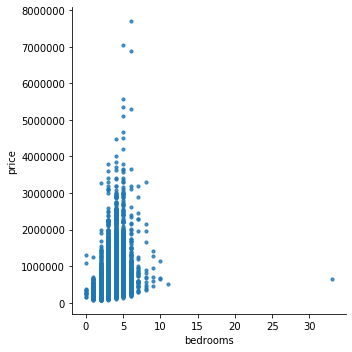

In [30]:
# Visualize the data, use only two of these attributes at the time

sns.lmplot('bedrooms','price', data=df,fit_reg=False, scatter_kws={"marker": "D", "s": 10})

Text(0.5, 1.0, 'Price vs Square Feet')

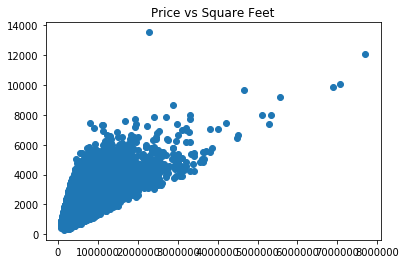

In [31]:
plt.scatter(df['price'], df['sqft_living'])
plt.title('Price vs Square Feet')

In [32]:
# You may need to normalise the attribute if necessary
X = df['sqft_living']
print (X)
norms = np.linalg.norm(X, axis=0)
print (norms)
print (X / norms)
def normalize_features(feature_matrix):
    norms = np.linalg.norm(feature_matrix, axis=0)
    normalized_features = feature_matrix / norms
    return (normalized_features, norms)

features, norms = normalize_features(np.array([[3.,6.,9.],[4.,8.,12.]]))
print (features)
print (norms)

0        1180
1        2570
2         770
3        1960
4        1680
         ... 
21608    1530
21609    2310
21610    1020
21611    1600
21612    1020
Name: sqft_living, Length: 21613, dtype: int64
334257.2641230105
0        0.003530
1        0.007689
2        0.002304
3        0.005864
4        0.005026
           ...   
21608    0.004577
21609    0.006911
21610    0.003052
21611    0.004787
21612    0.003052
Name: sqft_living, Length: 21613, dtype: float64
[[0.6 0.6 0.6]
 [0.8 0.8 0.8]]
[ 5. 10. 15.]


the mean of price is 540088.1417665294
the median of price is 450000.0
the std of price is 367118.7031813722



The positive correlation price and bathrooms is 0.5251375054139615
The positive correlation price and bedrooms is 0.3083495981456382
The positive correlation price and sqft_lot is 0.08966086058710013
The positive correlation price and yr_built is 0.05401153149479271


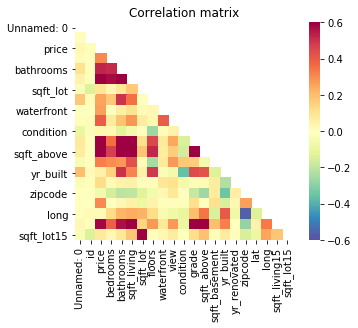

In [33]:
# Show positive correlation between attributes if necessary
corrs = df.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', mask=mask, square=True, vmin=-.6, vmax=.6)
plt.title('Correlation matrix')

price_list = df['price']
bath_list = df['bathrooms']
bed_list = df['bedrooms']
sqlot_list = df['sqft_lot']
year_list = df['yr_built']


print("the mean of {} is {}".format('price',np.mean(price_list)))
print("the median of {} is {}".format('price',np.median(price_list)))
print("the std of {} is {}".format('price',np.std(price_list)))

print("\n\n")

print("The positive correlation price and bathrooms is {}".format((np.corrcoef(price_list,bath_list)[0][1])))
print("The positive correlation price and bedrooms is {}".format((np.corrcoef(price_list,bed_list)[0][1])))
print("The positive correlation price and sqft_lot is {}".format((np.corrcoef(price_list,sqlot_list)[0][1])))
print("The positive correlation price and yr_built is {}".format((np.corrcoef(price_list,year_list)[0][1])))

In [34]:
# Construct a density-based clustering model and extract cluster labels and outliers to plot your results. 

# Prepare data for model
dbscan_data = df[['price','bedrooms']]
dbscan_data = dbscan_data.values.astype('float32', copy=False)
dbscan_data

array([[2.21900e+05, 3.00000e+00],
       [5.38000e+05, 3.00000e+00],
       [1.80000e+05, 2.00000e+00],
       ...,
       [4.02101e+05, 2.00000e+00],
       [4.00000e+05, 3.00000e+00],
       [3.25000e+05, 2.00000e+00]], dtype=float32)

In [35]:
# Normalize data
dbscan_data_scaler = StandardScaler().fit(dbscan_data)
dbscan_data = dbscan_data_scaler.transform(dbscan_data)
dbscan_data

array([[-0.86671734, -0.39873716],
       [-0.00568792, -0.39873716],
       [-0.9808494 , -1.4739593 ],
       ...,
       [-0.3758652 , -1.4739593 ],
       [-0.38158813, -0.39873716],
       [-0.5858817 , -1.4739593 ]], dtype=float32)

In [36]:
# Construct model
model = DBSCAN(eps=0.25, min_samples=12, metric='euclidean').fit(dbscan_data)
model

DBSCAN(algorithm='auto', eps=0.25, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=12, n_jobs=None, p=None)

In [37]:
# Separate outliers from clustered data
outliers_df = df[model.labels_ == -1]
clusters_df = df[model.labels_ != -1]


print ("outliers_df: ",outliers_df)
print ("clusters_df: ",clusters_df)
print ("model: ",model.labels_)

outliers_df:         Unnamed: 0          id             date      price  bedrooms  \
269           269  7960900060  20150504T000000  2900000.0         4   
300           300  3225069065  20140624T000000  3075000.0         4   
312           312  1860600135  20140502T000000  2384000.0         5   
527           527  3225079035  20140618T000000  1600000.0         6   
556           556  5486800070  20140620T000000  1950000.0         7   
...           ...         ...              ...        ...       ...   
20664       20664  4139300135  20140709T000000  2321000.0         5   
21040       21040  6447300365  20141113T000000  2900000.0         5   
21506       21506  2524069097  20140509T000000  2238890.0         5   
21530       21530  8964800330  20150407T000000  3000000.0         4   
21576       21576  9253900271  20150107T000000  3567000.0         5   

       bathrooms  sqft_living  sqft_lot  floors  waterfront  ...  grade  \
269         3.25         5050     20100     1.5           

In [38]:
colors = model.labels_
colors_clusters = colors[colors != -1]
color_outliers = 'black'

# Get info about the clusters
clusters = Counter(model.labels_)
print(clusters)
print(df[model.labels_ == -1].head())
print('Number of clusters = {}'.format(len(clusters)-1))

Counter({0: 9793, 2: 6855, 1: 2739, 3: 1546, 5: 243, -1: 210, 4: 198, 6: 17, 7: 12})
     Unnamed: 0          id             date      price  bedrooms  bathrooms  \
269         269  7960900060  20150504T000000  2900000.0         4       3.25   
300         300  3225069065  20140624T000000  3075000.0         4       5.00   
312         312  1860600135  20140502T000000  2384000.0         5       2.50   
527         527  3225079035  20140618T000000  1600000.0         6       5.00   
556         556  5486800070  20140620T000000  1950000.0         7       3.50   

     sqft_living  sqft_lot  floors  waterfront  ...  grade  sqft_above  \
269         5050     20100     1.5           0  ...     11        4750   
300         4550     18641     1.0           1  ...     10        2600   
312         3650      9050     2.0           0  ...     10        3370   
527         6050    230652     2.0           0  ...     11        6050   
556         4640     15235     2.0           0  ...     11      

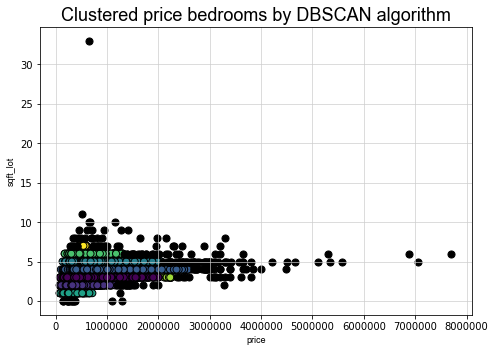

In [39]:
# Plot clusters and outliers
fig = plt.figure()

ax = fig.add_axes([.1,.1,1,1])

ax.scatter(clusters_df['price'], clusters_df['bedrooms'], c= colors_clusters, edgecolors='black', s=50)
ax.scatter(outliers_df['price'], outliers_df['bedrooms'], c= color_outliers, edgecolors='black', s=50)

ax.set_xlabel('price',family='Arial', fontsize=9)
ax.set_ylabel('sqft_lot',family='Arial', fontsize=9)

plt.title('Clustered price bedrooms by DBSCAN algorithm', family='Arial', fontsize=18)

plt.grid(which='major',color='#cccccc', alpha=0.85)

plt.show()